# Part II - Walmart Retail Dataset
## by Arikan Udoka

## Investigation Overview
My goal is to find out which products sell the most; region, state and product categories with the most orders. and how these categories relate with each other.


## Dataset Overview

There are 8399 orders from 795 customers across 48 states and 4 regions, 63 rows were dropped due to null values and 13 columns were dropped as they were not necessary to the analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
walmart = pd.read_csv('walmart_retail.csv')

In [3]:
#rename all columns in the dataframe
walmart.rename(columns=lambda x:x.strip().lower().replace(' ','_'), inplace=True)

In [4]:
#rename product_sub-category to product_subcategory
walmart.rename(columns={'product_sub-category':'product_subcategory'}, inplace=True)

In [5]:
#drop columns from the dataframe
walmart.drop(['customer_name', 'order_id', 'row_id', 'customer_age', 'zip_code',
              'number_of_records', 'city', 'product_name', 'order_date', 'ship_date',
              'product_base_margin', 'discount', 'unit_price', 'shipping_cost'
             ], axis=1, inplace=True)

In [6]:
#drop rows with null values
walmart.dropna(inplace=True)

In [7]:
# Change MO to Missouri
walmart.replace('MO', 'Missouri', inplace=True)

In [8]:
#change MA to Massachussetts
walmart.replace('MA', 'Massachussetts', inplace=True)

In [9]:
#convert region, product category, product sub category, state, customer_segment to categorical types
category_dict ={'region': ['East', 'West', 'Central', 'South'],
                'product_category': ['Office Supplies', 'Furniture', 'Technology'],
                'ship_mode': ['Regular Air', 'Express Air', 'Delivery Truck'],
                'customer_segment': ['Small Business', 'Home Office', 'Corporate', 'Consumer'],
                'order_priority': ['High', 'Not Specified', 'Low', 'Critical', 'Medium'],
                'state': ['Pennsylvania', 'California', 'Minnesota', 'Alabama', 'Utah',
       'Oregon', 'Nebraska', 'Louisiana', 'Texas', 'Iowa', 'Oklahoma',
       'Florida', 'New York', 'Illinois', 'Connecticut', 'Virginia',
       'South Carolina', 'Nevada', 'Maine', 'Ohio', 'Washington',
       'New Jersey', 'Wisconsin', 'Michigan', 'Vermont', 'Missouri',
       'Kentucky', 'Massachussetts', 'Tennessee', 'Colorado', 'Maryland',
       'Idaho', 'Mississippi', 'Arkansas', 'South Dakota', 'Rhode Island',
       'Indiana', 'New Mexico', 'Kansas', 'North Dakota', 'Arizona',
       'West Virginia', 'Georgia', 'Montana', 'Wyoming', 'North Carolina',
       'New Hampshire', 'Delaware']
               }

for var in category_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = category_dict[var])
    walmart[var] = walmart[var].astype(ordered_var)

In [10]:
# creates a function to loop through xlabel, ylabel, tile and show the plot
def label(x, t, y):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

In [11]:
# creates a function for xtick rotation
def rotate():
    plt.xticks(rotation=90)

## Product Category by Order Quantity
 

For this presentation I'll focus more on Product Category, Region and Order Count/Order Quantity.
I'll start by introducing the Product Category and Order Count/Order Quantity with a bar chart.

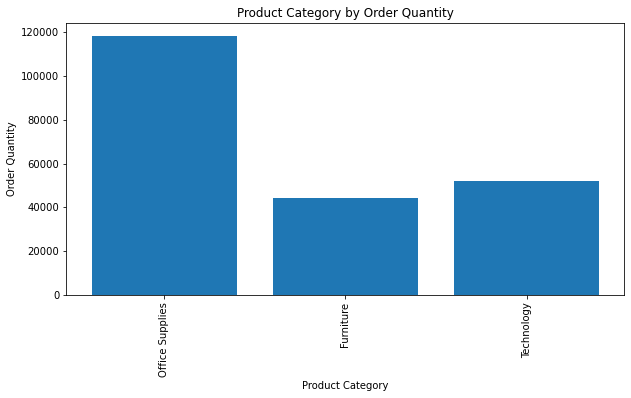

In [12]:
plt.figure(figsize=[10,5])

x = walmart['product_category'].unique()

y = walmart.groupby('product_category')['order_quantity'].sum()

plt.bar(x,y);
rotate()
label('Product Category', 'Product Category by Order Quantity', 'Order Quantity')

Next we see a pie chart that isn't a good chart to visualize the data we want to see.

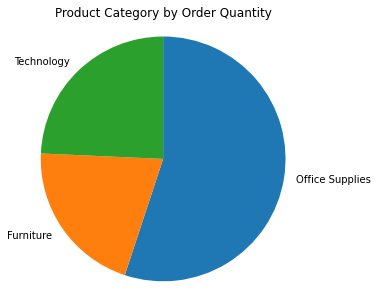

In [13]:
# plot product category in a pie chart
sort_cat = walmart.groupby('product_category')['order_quantity'].sum()

plt.figure(figsize=[20,5])
plt.pie(sort_cat, labels = sort_cat.index, startangle = 90, counterclock = False);

plt.axis('square');
plt.title('Product Category by Order Quantity');

## Order Quantity by Region


Then we'll move on to Region and Order Count/Order Quantity using another bar chart as we are still trying to see which has the highest.

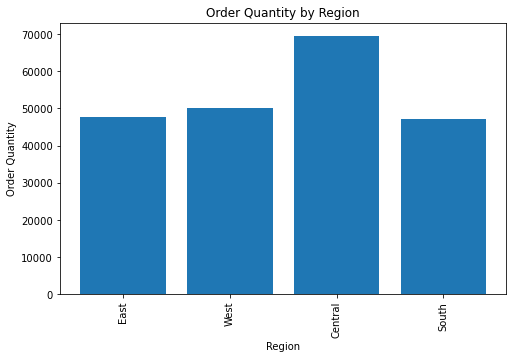

In [14]:
#adjust figsize
plt.figure(figsize=[8,5]);

x = walmart['region'].unique()
y = walmart.groupby('region')['order_quantity'].sum()

plt.bar(x, y)

rotate()
label('Region', 'Order Quantity by Region', 'Order Quantity')

## Product Category Order Count by Region

Next we'll see the Product Category and Order Count/Order Quantity by region to see how these relate and if there are any changes to what we saw previously.

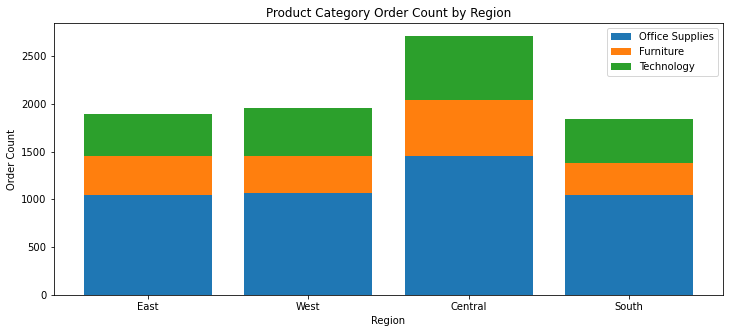

In [15]:
product_category = ['Office Supplies', 'Furniture', 'Technology']
region = ['East', 'West', 'Central', 'South']
# right plot: stacked bar chart, absolute counts
plt.figure(figsize = [12, 5])
baselines = np.zeros(len(region))
# for each second-variable category:
for i in range(len(product_category)):
    # isolate the counts of the first category,
    cat2 = product_category[i]
    inner_counts = walmart[walmart['product_category'] == cat2]['region'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(region)), height = inner_counts[region],
            bottom = baselines)
    baselines += inner_counts[region]

plt.xticks(np.arange(len(region)), region)
plt.legend(product_category);
label('Region', 'Product Category Order Count by Region', 'Order Count')

## Sales by Order Quantity and Region

Finally, I close out with the scatter plot showing how there's a stark difference when another variable not previously used changes how we view the data. 

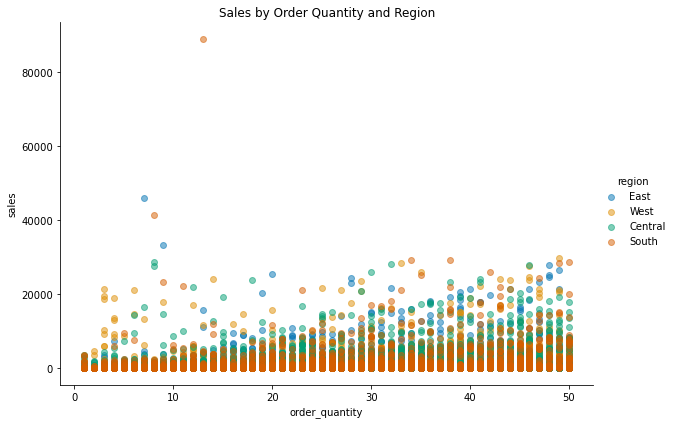

In [16]:

g = sb.FacetGrid(data = walmart, hue = 'region', height = 6, aspect=11.7/8.27, palette = 'colorblind').set(title='Sales by Order Quantity and Region')
g.map(plt.scatter, 'order_quantity', 'sales', alpha=0.5)
g.add_legend();


In [17]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 722878 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\USER\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\USER\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\USER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\USER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C: